<a href="https://colab.research.google.com/github/felixzhao/HARDataset/blob/main/Halter_V1_HAR_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib as mpl

In [ ]:
import tensorflow as tf

In [ ]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
prefix_path = "drive/MyDrive/UCI_HAR_Dataset/"

In [ ]:
# load dataset
from numpy import dstack
from pandas import read_csv
 
# load a single file as a numpy array
def load_file(filepath):
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
  return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
  loaded = list()
  for name in filenames:
    data = load_file(prefix + name)
    loaded.append(data)
  # stack group so that features are the 3rd dimension
  loaded = dstack(loaded)
  return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
  filepath = prefix + group + '/Inertial Signals/'
  # load all 9 files as a single array
  filenames = list()
  # total acceleration
  filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
  # body acceleration
  filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
  # body gyroscope
  filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
  # load input data
  X = load_group(filenames, filepath)
  # load class output
  y = load_file(prefix + group + '/y_'+group+'.txt')
  return X, y
 
# load all train
trainX, trainy = load_dataset('train', prefix_path)
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test', prefix_path)
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


# train model

In [ ]:
train_shape = trainX.shape
batch_size = train_shape[0]
sequence_length = train_shape[1]
number_of_features = train_shape[2]
print(f"{batch_size=}, {sequence_length=}, {number_of_features=} ")

batch_size=7352, sequence_length=128, number_of_features=9 


In [ ]:
number_of_classes = len(np.unique(trainy))
num_classes = number_of_classes
print(f"{number_of_classes=}")

number_of_classes=6


In [ ]:
t_y_train = trainy - 1 #trainy.flatten()
t_y_test = testy - 1 #testy.flatten()
t_y_train

array([[4],
       [4],
       [4],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
t_y_test

array([[4],
       [4],
       [4],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
np.unique(t_y_train)

array([0, 1, 2, 3, 4, 5])

In [ ]:
y_train = tf.keras.utils.to_categorical(t_y_train)
y_test = tf.keras.utils.to_categorical(t_y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
type(y_train)
print(len(y_train), len(y_train[0]))
y_train[0]

7352 6


array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
learning_rate = 0.01
n_hidden = 32
batch_size = 64
shuffle_buffer_size = 1000
epochs = 30

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, input_shape=(sequence_length, number_of_features)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(number_of_classes, activation="softmax")
])

# model.build()

#Print the model summary 
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 32)                5376      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

In [ ]:
# Train the model
# history = model.fit(trainX, trainy, validation_data=(testX, testy) ,epochs=10)
history = model.fit(trainX, y_train ,epochs=30)

Epoch 1/30
230/230 [==============================] - 14s 51ms/step - loss: 1.0756 - accuracy: 0.5544
Epoch 2/30
230/230 [==============================] - 15s 66ms/step - loss: 0.8166 - accuracy: 0.6840
Epoch 3/30
230/230 [==============================] - 12s 50ms/step - loss: 0.5701 - accuracy: 0.7591
Epoch 4/30
230/230 [==============================] - 11s 46ms/step - loss: 0.5082 - accuracy: 0.8198
Epoch 5/30
230/230 [==============================] - 11s 46ms/step - loss: 0.3761 - accuracy: 0.8768
Epoch 6/30
230/230 [==============================] - 11s 46ms/step - loss: 0.6384 - accuracy: 0.8097
Epoch 7/30
230/230 [==============================] - 11s 49ms/step - loss: 1.2513 - accuracy: 0.5245
Epoch 8/30
230/230 [==============================] - 10s 44ms/step - loss: 1.0378 - accuracy: 0.5737
Epoch 9/30
230/230 [==============================] - 10s 44ms/step - loss: 1.0290 - accuracy: 0.5963
Epoch 10/30
230/230 [==============================] - 10s 45ms/step - loss: 1.227

In [ ]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    # plt.show()

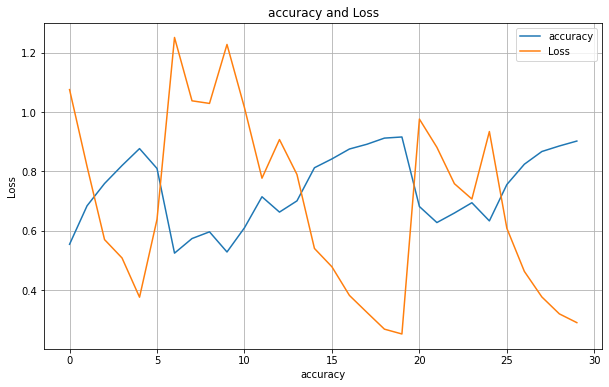

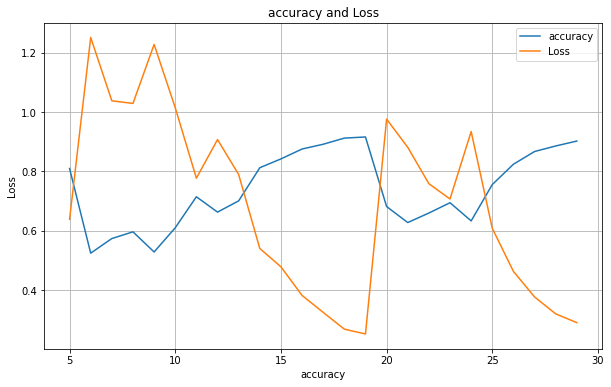

In [ ]:
# Get mae and loss from history log
mae=history.history['accuracy']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, loss), 
    title='accuracy and Loss', 
    xlabel='accuracy',
    ylabel='Loss',
    legend=['accuracy', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='accuracy and Loss', 
    xlabel='accuracy',
    ylabel='Loss',
    legend=['accuracy', 'Loss']
    )

# evaluation model

In [ ]:
score = model.evaluate(testX, y_test)
score

93/93 [==============================] - 2s 15ms/step - loss: 0.4879 - accuracy: 0.8619


[0.48785629868507385, 0.8618934750556946]

In [ ]:
y_pred = model.predict(testX)

93/93 [==============================] - 2s 15ms/step


In [ ]:
y_pred_res = tf.argmax(y_pred, axis=1)
y_test_res = tf.argmax(y_test, axis=1)

In [ ]:
cm = tf.math.confusion_matrix(y_test_res, y_pred_res, num_classes=num_classes)

In [ ]:
class_names = [ 'WALKING',
    'WALKING_UPSTAIRS',
     'WALKING_DOWNSTAIRS',
     'SITTING',
     'STANDING',
     'LAYING',
]

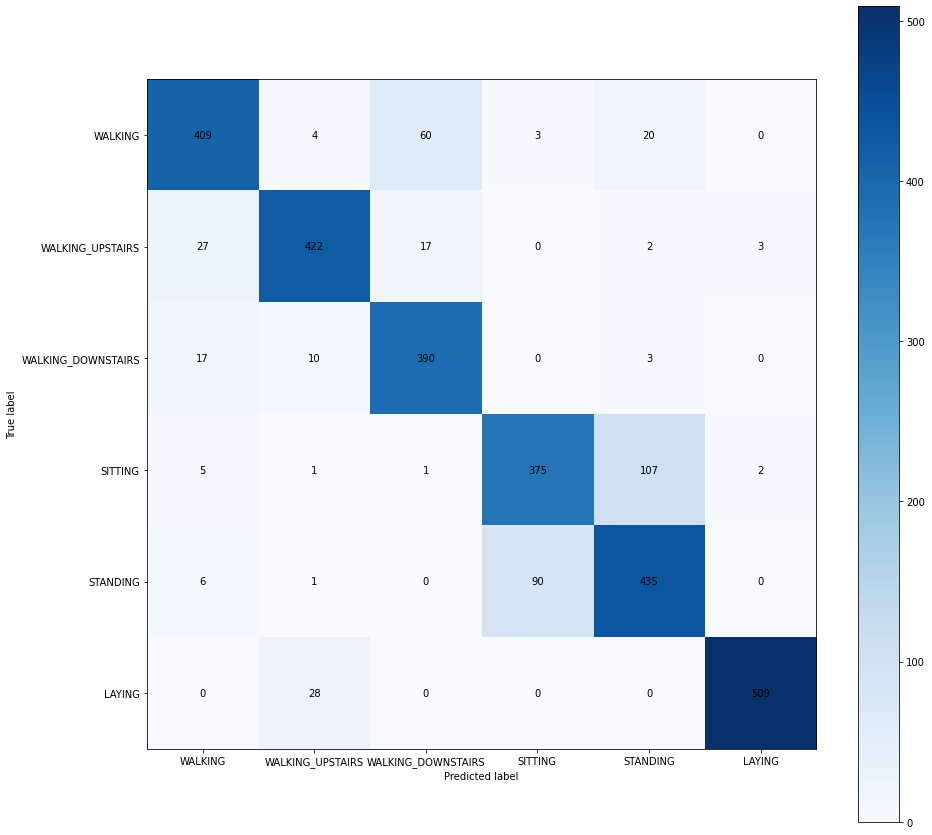

In [ ]:
cm = np.array(cm)

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

## CNN + LSTM

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=4,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=(sequence_length, number_of_features)),
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(number_of_classes, activation="softmax")
])

model.summary()



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 128, 32)           1184      
                                                                 
 lstm_25 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 64)                2112      
                                                                 
 dense_41 (Dense)            (None, 6)                 390       
                                                                 
Total params: 12,006
Trainable params: 12,006
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

history = model.fit(trainX, y_train ,epochs=30)

Epoch 1/30
230/230 [==============================] - 18s 67ms/step - loss: 0.8298 - accuracy: 0.5993
Epoch 2/30
230/230 [==============================] - 13s 58ms/step - loss: 0.6061 - accuracy: 0.7322
Epoch 3/30
230/230 [==============================] - 14s 62ms/step - loss: 0.3833 - accuracy: 0.8610
Epoch 4/30
230/230 [==============================] - 14s 61ms/step - loss: 0.2608 - accuracy: 0.9144
Epoch 5/30
230/230 [==============================] - 14s 60ms/step - loss: 0.2925 - accuracy: 0.8951
Epoch 6/30
230/230 [==============================] - 13s 57ms/step - loss: 0.1940 - accuracy: 0.9314
Epoch 7/30
230/230 [==============================] - 14s 59ms/step - loss: 0.3387 - accuracy: 0.8713
Epoch 8/30
230/230 [==============================] - 14s 60ms/step - loss: 0.1865 - accuracy: 0.9346
Epoch 9/30
230/230 [==============================] - 14s 61ms/step - loss: 0.1611 - accuracy: 0.9414
Epoch 10/30
230/230 [==============================] - 14s 61ms/step - loss: 0.166

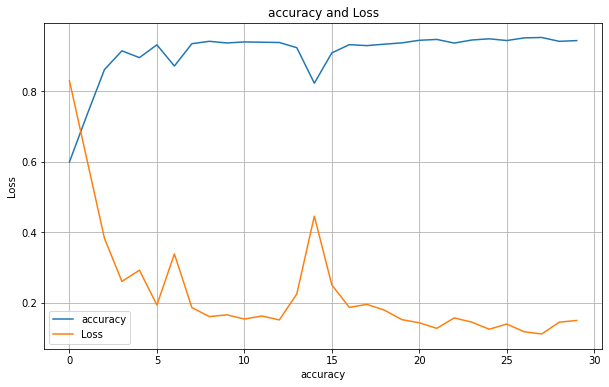

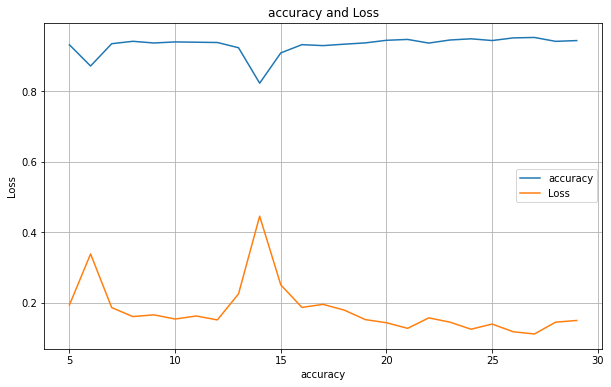

In [ ]:
# Get mae and loss from history log
mae=history.history['accuracy']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, loss), 
    title='accuracy and Loss', 
    xlabel='accuracy',
    ylabel='Loss',
    legend=['accuracy', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='accuracy and Loss', 
    xlabel='accuracy',
    ylabel='Loss',
    legend=['accuracy', 'Loss']
    )

In [ ]:
score = model.evaluate(testX, y_test)
score

93/93 [==============================] - 2s 16ms/step - loss: 0.3852 - accuracy: 0.9097


[0.3851560652256012, 0.9097387194633484]

In [ ]:
y_pred = model.predict(testX)
y_pred_res = tf.argmax(y_pred, axis=1)

93/93 [==============================] - 2s 15ms/step


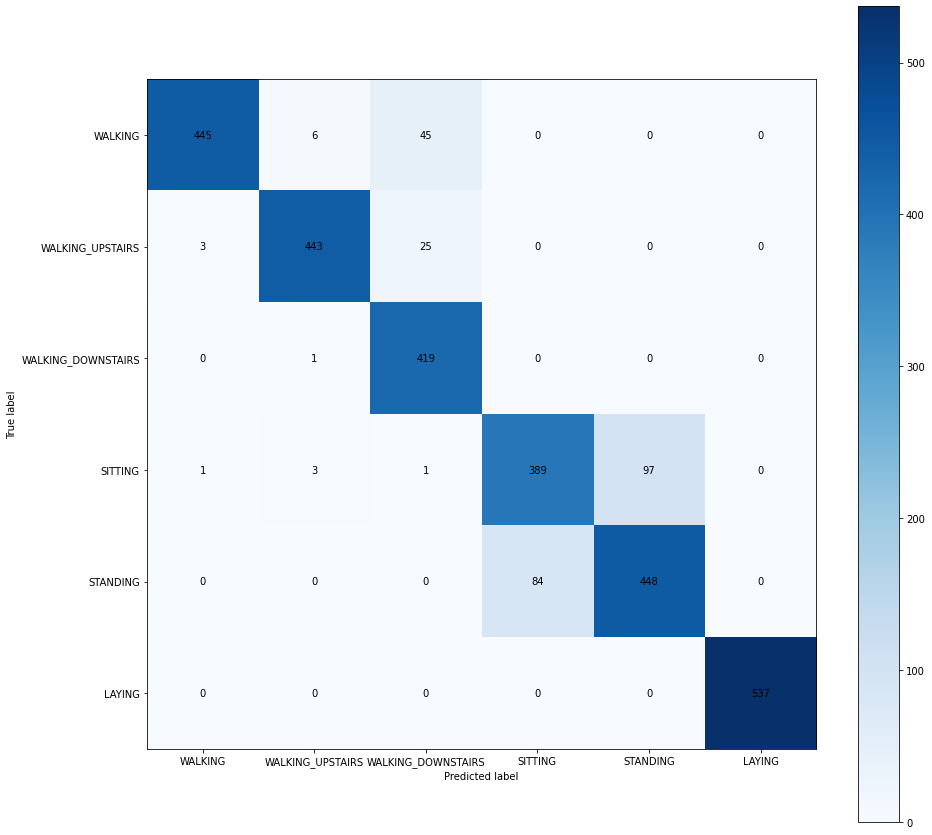

In [ ]:
cm = tf.math.confusion_matrix(y_test_res, y_pred_res, num_classes=num_classes)
cm = np.array(cm)

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")